# QIS Cluster Analysis

## Import Libraries

In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\RRQ1FYQ\\Documents\\RMP')

In [5]:
from EquityHedging.datamanager import data_manager as dm
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 

## Import Normalized Hedge Metrics

In [3]:
file_path = dm.EQUITY_HEDGE_DATA+'def_uni_hedge_metrics_more.xlsx'
normalized_hm = pd.read_excel(dm.EQUITY_HEDGE_DATA+'def_uni_hedge_metrics_more.xlsx', index_col=(0))
features = ['Downside Reliability', 'Upside Reliability', 'Convexity', 'Cost', 'Decay']
normalized_hm = normalized_hm[features]
normalized_hm.head(20)

,Downside Reliability,Upside Reliability,Convexity,Cost,Decay
99%/90% Put Spread,-0.582879,-0.644474,0.393155,-1.675492,35
Down Var,-0.302584,0.291293,0.950600,-2.004666,277
Vortex,-0.132168,0.230881,1.006886,-1.670196,157
VOLA,-0.721153,-0.369929,1.246549,-1.581479,322
Dynamic Put Spread,-0.714723,-0.718250,0.255372,-1.249904,116
VRR,-0.061645,0.004125,0.541243,-2.192224,140
GW Dispersion,-0.500056,0.063793,0.345939,-1.046722,365
Corr Hedge,-0.213739,0.136868,1.087390,-1.197076,365
Def Var,0.017510,-0.039077,0.223392,-0.470096,308
Weighted Hedges,-0.640437,-0.074506,0.413746,-0.595126,365


In [4]:

# Assume you have your data stored in a numpy array called 'data'
# Perform hierarchical clustering
#Z = linkage(data, method='ward')
links = shc.linkage(normalized_hm, method = 'ward')
# Set a threshold to determine the number of clusters 
threshold = 2.5  
# You can adjust this value based on your data and requirements

# Retrieve cluster labels for each data point 
clusters = fcluster(links, threshold, criterion='distance')


In [7]:
normalized_hm['Cluster'] = list(clusters)

In [8]:
normalized_hm

,Downside Reliability,Upside Reliability,Convexity,Cost,Decay,Cluster
99%/90% Put Spread,-0.582879,-0.644474,0.393155,-1.675492,35,10
Down Var,-0.302584,0.291293,0.950600,-2.004666,277,61
Vortex,-0.132168,0.230881,1.006886,-1.670196,157,27
VOLA,-0.721153,-0.369929,1.246549,-1.581479,322,70
Dynamic Put Spread,-0.714723,-0.718250,0.255372,-1.249904,116,38
...,...,...,...,...,...,...
UBS G9 Rate Value + Trend,-0.126371,-0.062062,0.274249,-1.229979,274,60
UBS Defensive Portfolio Carry,-0.599522,-0.408413,0.773287,-2.300093,174,19
UBS Defensive Portfolio Core,-0.719325,-0.562523,1.002479,-2.945006,136,35
UBS Defensive Portfolio Convex,-0.765633,-0.645810,1.156781,-3.699030,136,35


## Find what strats are in each cluster
find what strats rank highest in each cluster 
best in each metric
best over all

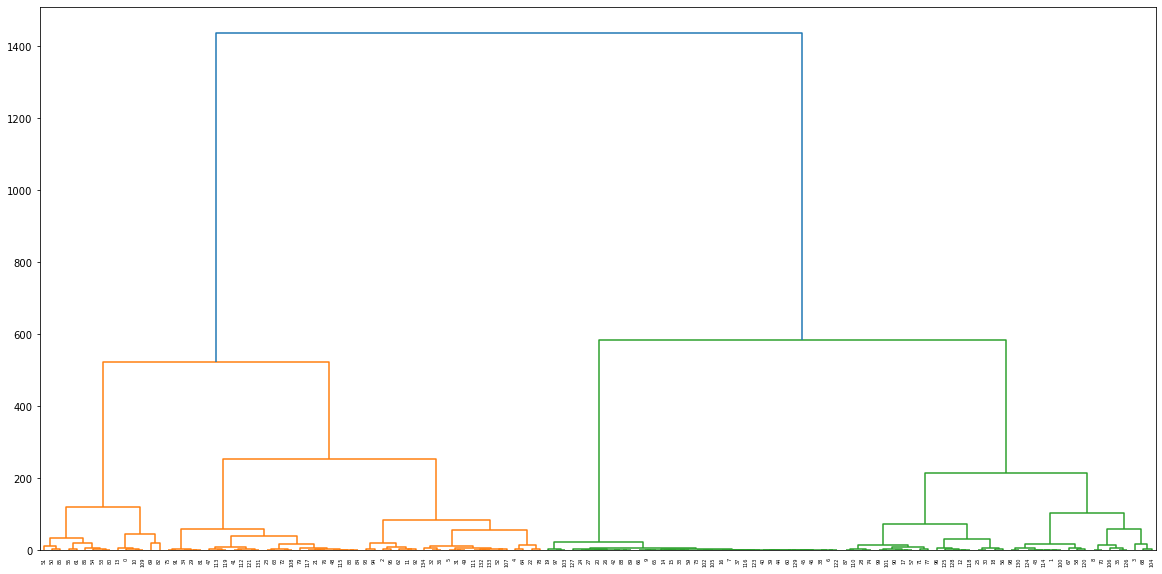

In [9]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 45)
dend = shc.dendrogram(links)

## Dendrogram 

## Principal Component Analysis

In [ ]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_hm)

In [ ]:
X_principal = pd.DataFrame(X_principal, index = normalized_hm.index)
X_principal.columns = ['P1', 'P2']

In [ ]:
X_principal

## Elbow Method

In [ ]:
inertia = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(normalized_hm)
    kmeanModel.fit(normalized_hm)
    inertia.append(kmeanModel.inertia_)
    
    # Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

## Determine amount of clusters

In [ ]:
# input clusters here
ncluster = 3

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = ncluster, affinity = 'euclidean', linkage = 'ward')
X_principal['Cluster'] = ac2.fit_predict(X_principal)
X_principal2 = X_principal.copy()
X_principal2['Strat'] = list(X_principal.index)
X_principal2

## Agglomerative Clustering 

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = ncluster, affinity = 'euclidean', linkage = 'ward')
fig = px.scatter(X_principal2, x= 'P1',y ='P2', 
                 color = ac2.fit_predict(X_principal), hover_data = ['Strat'])
fig

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = ncluster, affinity = 'euclidean', linkage = 'single')
fig = px.scatter( x= X_principal['P1'],y =X_principal['P2'], color = ac2.fit_predict(X_principal))
fig

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = ncluster, affinity = 'euclidean', linkage = 'complete')
fig = px.scatter( x= X_principal['P1'],y =X_principal['P2'], color = ac2.fit_predict(X_principal))
fig

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = ncluster, affinity = 'euclidean', linkage = 'average')
fig = px.scatter( x= X_principal['P1'],y =X_principal['P2'], color = ac2.fit_predict(X_principal))
fig